<a href="https://colab.research.google.com/github/pchernic/python_for_financial_data/blob/main/Linear_Regression_and_Beta_Calculator_Financial_Market_Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Beta (β) calculator:


The code is performing a simple linear regression. In particular, it's calculating the beta coefficient, which **represents the sensitivity of a stock's returns to the returns of a market index,** often used in the context of the **Capital Asset Pricing Model (CAPM)**, a widely used **financial model that describes the relationship between an asset's expected return and its risk.**


- The code is **regressing the daily returns of a specific stock against the daily returns of a market index.** The beta coefficient that's being calculated tells **how much the stock's returns are expected to change for a given change in the market index's returns.**





- The model fitting can be represented by the equation:

Stock Return
=
β
×
Market Return + Intercept
Stock Return=β×Market Return+Intercept


where:

- Stock Return is the dependent variable (y-axis).
- Market Return is the independent variable (x-axis).


- **β** : **The coefficient being calculated, representing the sensitivity of the stock's returns to the market returns**

- Intercept: The intercept term of the linear equation.

**This type of analysis is often used to understand how a particular stock reacts to market movements and is a fundamental concept in finance, especially when considering risk and portfolio management.**

## Function Example

### AAPL Stock

In [1]:
import yfinance as yf
import statsmodels.api as sm
from datetime import timedelta, datetime

def calculate_beta(stock_symbol, market_index_symbol, start_date, end_date):
    # Download historical price data for the stock and market index
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    market_data = yf.download(market_index_symbol, start=start_date, end=end_date)

    # Calculate daily returns for the stock and market index
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    # Add a constant to the independent variable (market returns) for the regression
    market_returns_with_const = sm.add_constant(market_returns)

    # Fit a linear regression model of stock returns on market returns
    model = sm.OLS(stock_returns, market_returns_with_const).fit()

    # Extract the beta coefficient from the regression results
    beta = model.params[1]

    return beta

if __name__ == "__main__":
    stock_symbol = "AAPL"  # Replace with your desired stock symbol
    market_index_symbol = "^GSPC"  # Replace with your desired market index symbol (e.g., S&P 500)
    start_date = "2020-01-01"
    end_date = "2021-01-01"

    beta = calculate_beta(stock_symbol, market_index_symbol, start_date, end_date)
    print(f"Beta of {stock_symbol} from {start_date} to {end_date}: {beta:.2f}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta of AAPL from 2020-01-01 to 2021-01-01: 1.12


## Linear Regression

In [2]:
import yfinance as yf
import statsmodels.api as sm
from datetime import timedelta, datetime

def calculate_beta(stock_symbol, market_index_symbol, start_date, end_date):
    # Download historical price data for the stock and market index
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    market_data = yf.download(market_index_symbol, start=start_date, end=end_date)

    # Calculate daily returns for the stock and market index
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    # Add a constant to the independent variable (market returns) for the regression
    market_returns_with_const = sm.add_constant(market_returns)

    # Fit a linear regression model of stock returns on market returns
    model = sm.OLS(stock_returns, market_returns_with_const).fit()

    # Extract the beta coefficient from the regression results
    beta = model.params[1]

    return beta, model

if __name__ == "__main__":
    stock_symbol = "AAPL"  # Replace with your desired stock symbol
    market_index_symbol = "^GSPC"  # Replace with your desired market index symbol (e.g., S&P 500)
    start_date = "2020-01-01"
    end_date = "2021-01-01"

    beta, model = calculate_beta(stock_symbol, market_index_symbol, start_date, end_date)
    print(f"Beta of {stock_symbol} from {start_date} to {end_date}: {beta:.2f}")

    # Display the model summary
    print("---------------------------------------")
    print(model.summary())



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta of AAPL from 2020-01-01 to 2021-01-01: 1.12
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     549.7
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           4.55e-65
Time:                        19:56:57   Log-Likelihood:                 678.03
No. Observations:                 252   AIC:                            -1352.
Df Residuals:                     250   BIC:                            -1345.
Df Model:                           1                                         
Covariance Type:            nonrobust                         

### Ploting Daily Returns

[*********************100%%**********************]  1 of 1 completed


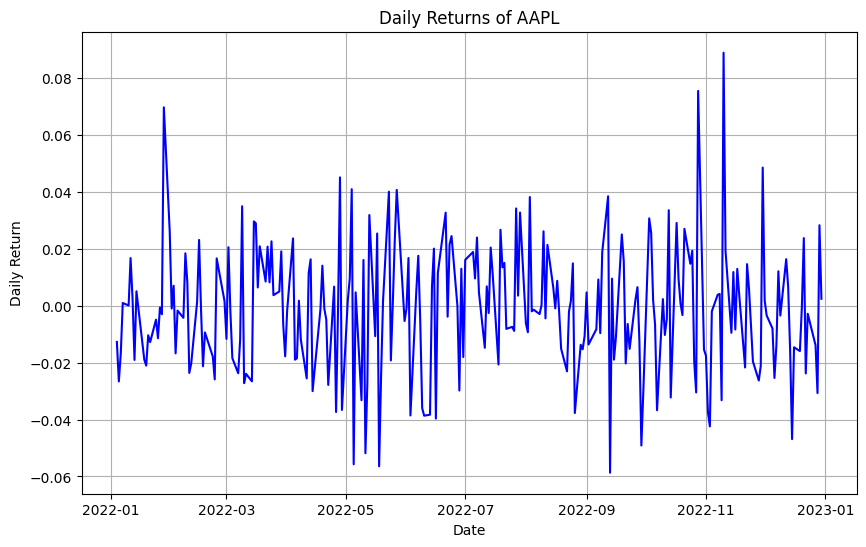

In [3]:
import matplotlib.pyplot as plt


stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Download historical price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Drop missing values
stock_data.dropna(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(stock_data.index, stock_data['Daily_Return'], color='blue', linewidth=1.5)
plt.title(f'Daily Returns of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


# Brazilian Stock Example:

Stock Example: WEGE3.SA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta of WEGE3 from 2020-01-01 to 2023-01-01: 0.81
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     347.4
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           6.84e-64
Time:                        19:56:58   Log-Likelihood:                 1746.7
No. Observations:                 744   AIC:                            -3489.
Df Residuals:                     742   BIC:                            -3480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

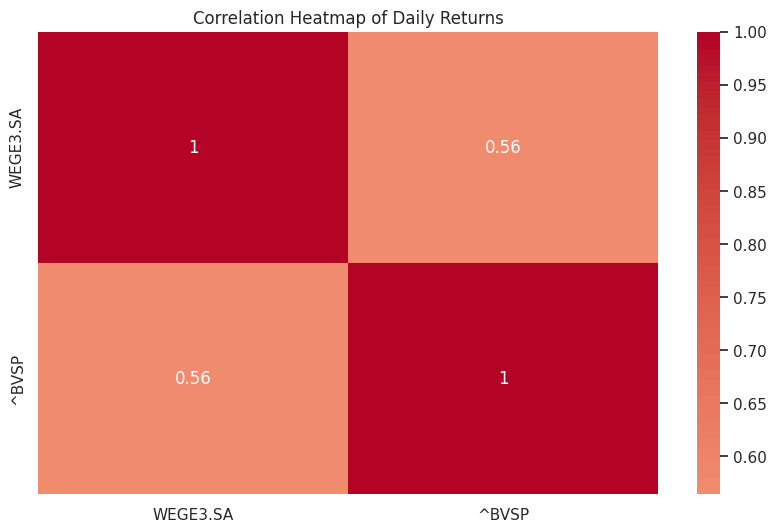

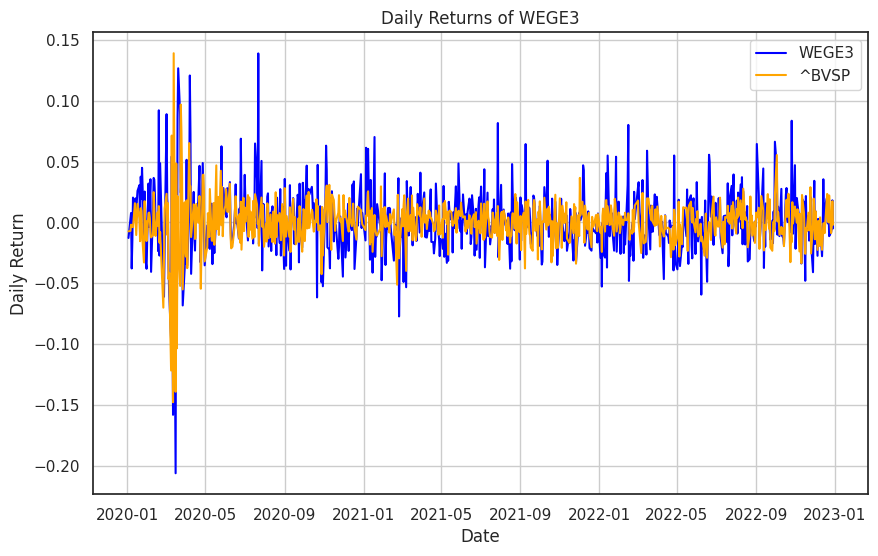

In [4]:
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

def calculate_beta(stock_symbol, market_index_symbol, start_date, end_date):
    # Download historical price data for the stock and market index
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    market_data = yf.download(market_index_symbol, start=start_date, end=end_date)

    # Calculate daily returns for the stock and market index
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    # Add a constant to the independent variable (market returns) for the regression
    market_returns_with_const = sm.add_constant(market_returns)

    # Fit a linear regression model of stock returns on market returns
    model = sm.OLS(stock_returns, market_returns_with_const).fit()

    # Extract the beta coefficient from the regression results
    beta = model.params[1]

    return beta, model

if __name__ == "__main__":
    stock_symbol = "WEGE3.SA"  # Replace with your desired stock symbol
    stock_name = "WEGE3"  # Replace with the actual name of the stock
    market_index_symbol = "^BVSP"  # Replace with your desired market index symbol (e.g., S&P 500)
    start_date = "2020-01-01"
    end_date = "2023-01-01"

    beta, model = calculate_beta(stock_symbol, market_index_symbol, start_date, end_date)
    print(f"Beta of {stock_name} from {start_date} to {end_date}: {beta:.2f}")

    # Display the model summary with stock name
    model_summary = model.summary()
    model_summary = model_summary.as_text().replace("Dep. Variable:  Adj Close", f"Dep. Variable:  {stock_symbol}")
    print(model_summary)
    print()

    # Calculate daily returns for the specified stock and market index
    stocks_data = yf.download([stock_symbol, market_index_symbol], start=start_date, end=end_date)['Adj Close']
    daily_returns = stocks_data.pct_change().dropna()

    # Set Seaborn style for plotting
    sns.set(style='white')

    # Plotting correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Daily Returns')
    plt.show()
    print()

    # Plotting daily returns
    plt.figure(figsize=(10, 6))
    plt.plot(daily_returns.index, daily_returns[stock_symbol], color='blue', label=stock_name)
    plt.plot(daily_returns.index, daily_returns[market_index_symbol], color='orange', label=market_index_symbol)
    plt.title(f'Daily Returns of {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    plt.show()


##Portfolio example:

- "WEGE3.SA", "VALE3.SA", "ITSA4.SA", "BBAS3.SA", "PRIO3.SA"

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta of WEGE3 from 2020-01-01 to 2023-01-01: 0.81
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     347.4
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           6.84e-64
Time:                        20:07:28   Log-Likelihood:                 1746.7
No. Observations:                 744   AIC:                            -3489.
Df Residuals:                     742   BIC:                            -3480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

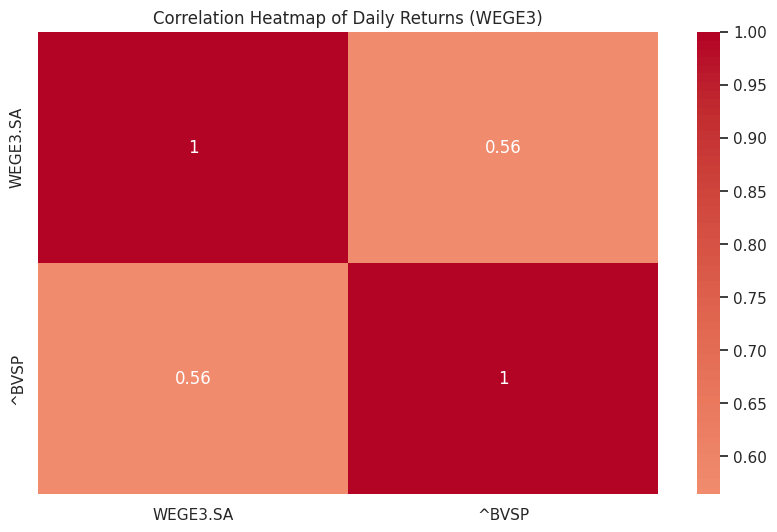

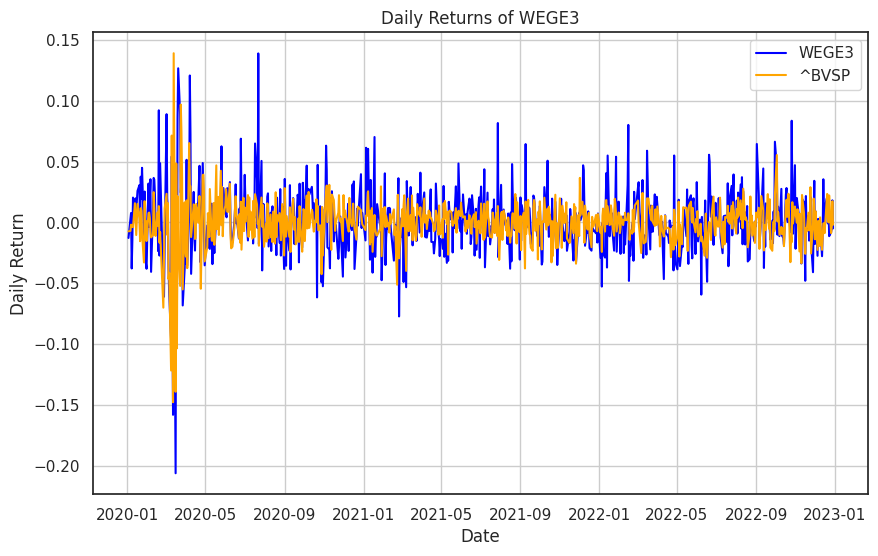

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta of VALE3 from 2020-01-01 to 2023-01-01: 0.94
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     578.6
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           5.76e-95
Time:                        20:07:31   Log-Likelihood:                 1825.9
No. Observations:                 744   AIC:                            -3648.
Df Residuals:                     742   BIC:                            -3639.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

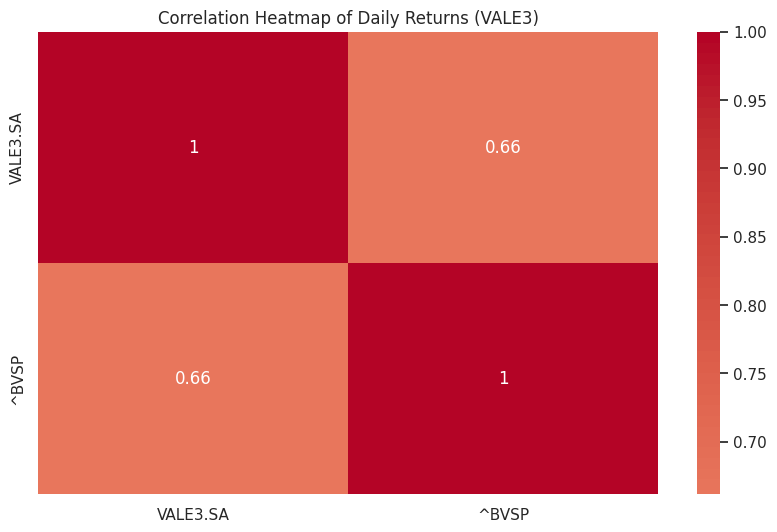

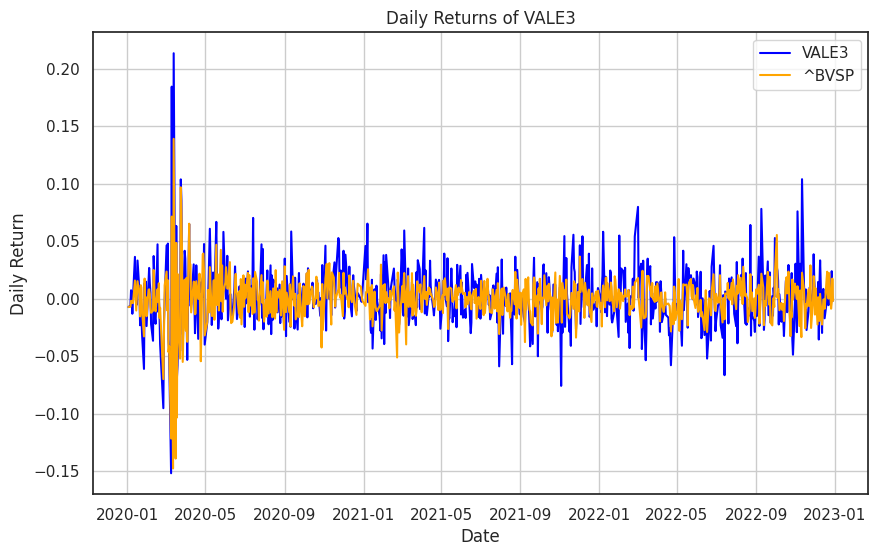

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta of ITSA4 from 2020-01-01 to 2023-01-01: 0.87
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1488.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          1.81e-179
Time:                        20:07:33   Log-Likelihood:                 2237.1
No. Observations:                 744   AIC:                            -4470.
Df Residuals:                     742   BIC:                            -4461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

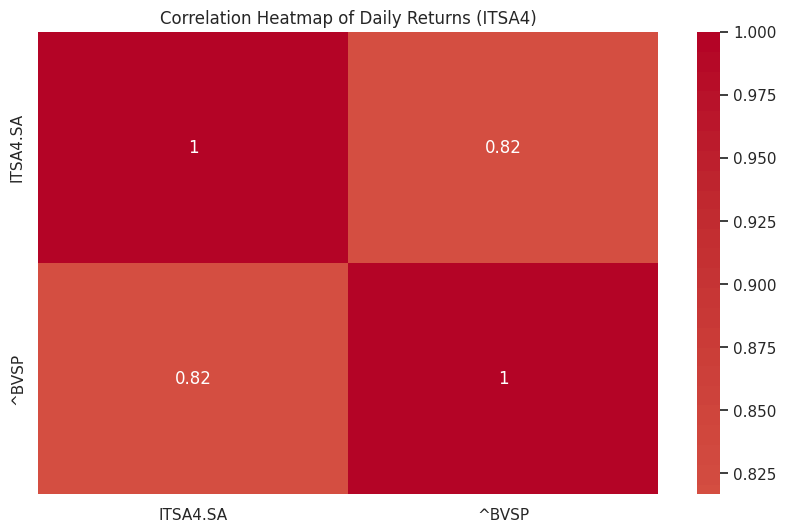

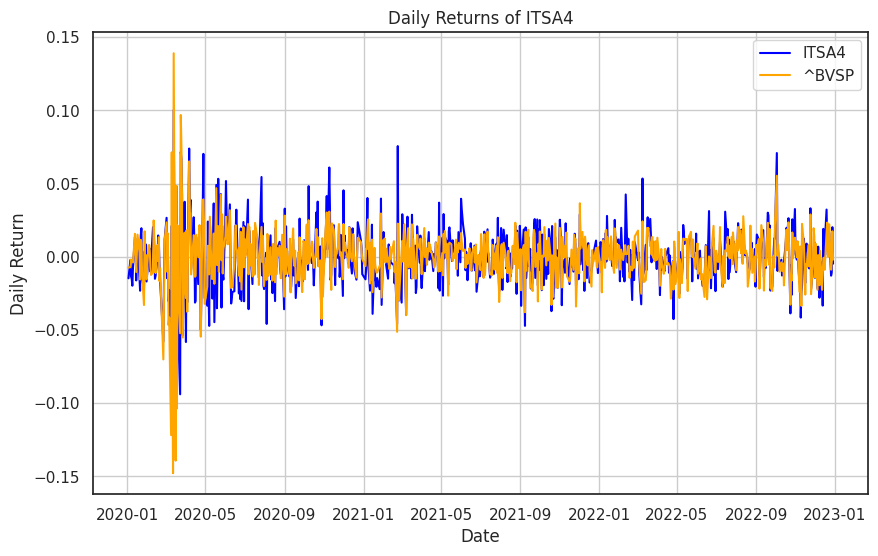

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta of BBAS3 from 2020-01-01 to 2023-01-01: 1.18
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1518.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          1.24e-181
Time:                        20:07:35   Log-Likelihood:                 2019.9
No. Observations:                 744   AIC:                            -4036.
Df Residuals:                     742   BIC:                            -4026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

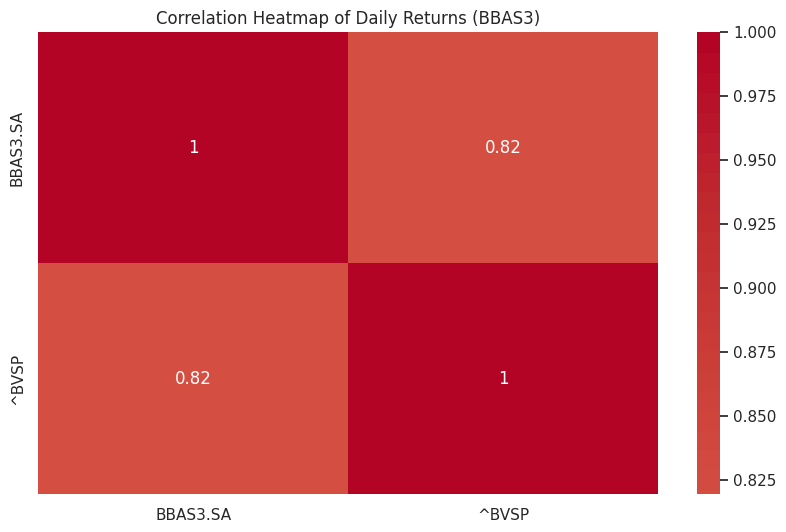

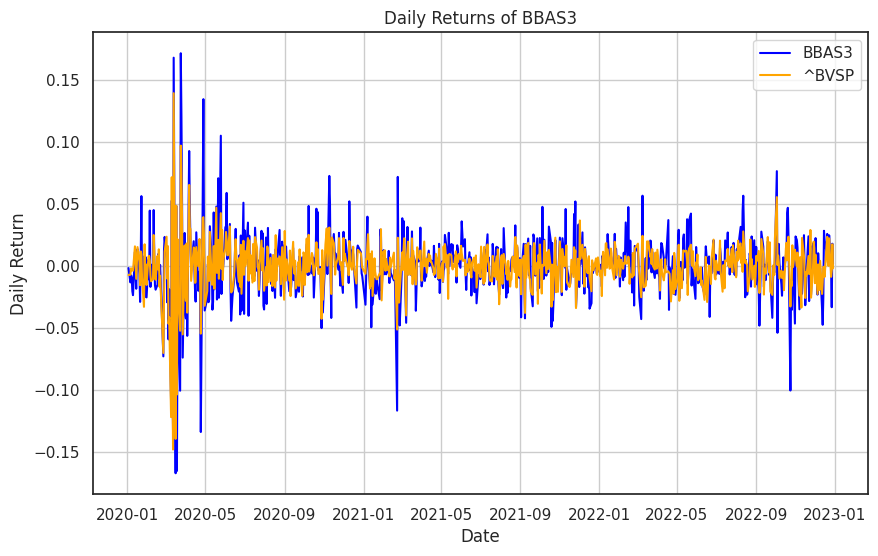

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta of PRIO3 from 2020-01-01 to 2023-01-01: 1.53
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     475.3
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           7.99e-82
Time:                        20:07:36   Log-Likelihood:                 1392.9
No. Observations:                 744   AIC:                            -2782.
Df Residuals:                     742   BIC:                            -2773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef 

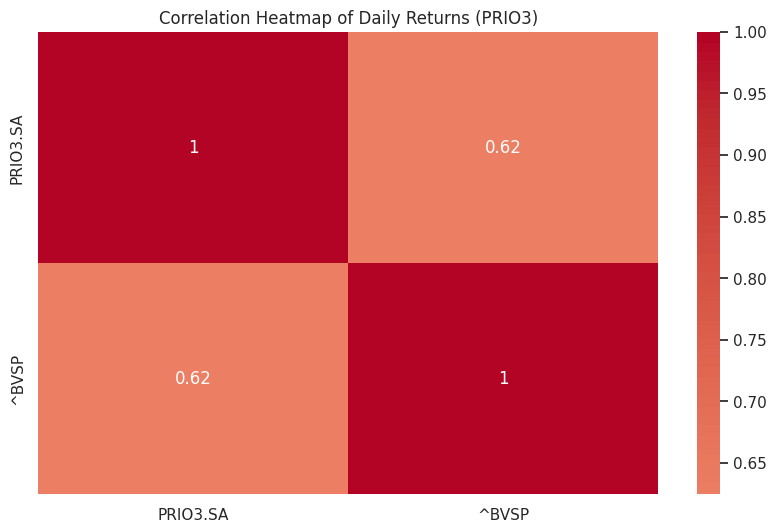

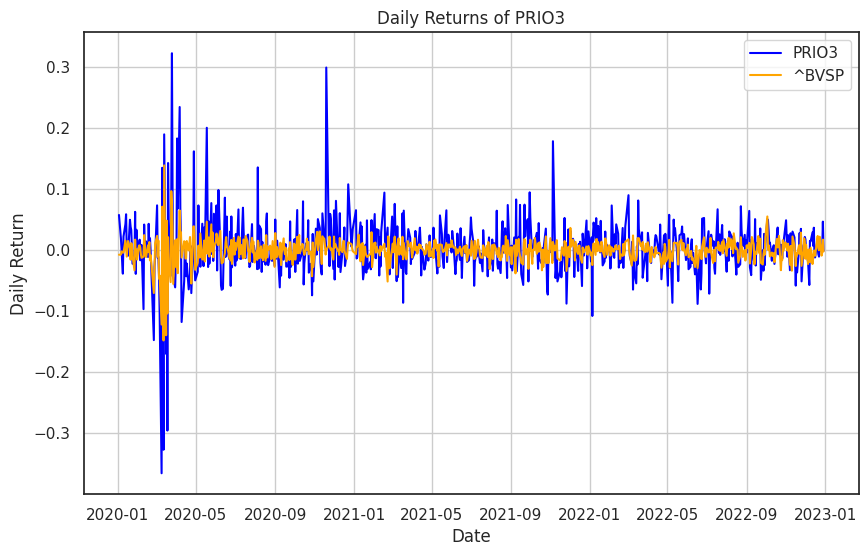

In [8]:
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

def calculate_beta(stock_symbol, market_index_symbol, start_date, end_date):
    # Download historical price data for the stock and market index
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    market_data = yf.download(market_index_symbol, start=start_date, end=end_date)

    # Calculate daily returns for the stock and market index
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    # Add a constant to the independent variable (market returns) for the regression
    market_returns_with_const = sm.add_constant(market_returns)

    # Fit a linear regression model of stock returns on market returns
    model = sm.OLS(stock_returns, market_returns_with_const).fit()

    # Extract the beta coefficient from the regression results
    beta = model.params[1]

    return beta, model

if __name__ == "__main__":
    stock_symbols = ["WEGE3.SA", "VALE3.SA", "ITSA4.SA", "BBAS3.SA", "PRIO3.SA"]
    market_index_symbol = "^BVSP"  # Replace with your desired market index symbol (e.g., S&P 500)
    start_date = "2020-01-01"
    end_date = "2023-01-01"

    for stock_symbol in stock_symbols:
        stock_name = stock_symbol.split(".")[0]  # Extract stock name from symbol
        beta, model = calculate_beta(stock_symbol, market_index_symbol, start_date, end_date)
        print(f"Beta of {stock_name} from {start_date} to {end_date}: {beta:.2f}")

        # Display the model summary with stock name
        model_summary = model.summary()
        model_summary = model_summary.as_text().replace("Dep. Variable:  Adj Close", f"Dep. Variable:  {stock_symbol}")
        print(model_summary)
        print()

        # Calculate daily returns for the specified stock and market index
        stocks_data = yf.download([stock_symbol, market_index_symbol], start=start_date, end=end_date)['Adj Close']
        daily_returns = stocks_data.pct_change().dropna()

        # Set Seaborn style for plotting
        sns.set(style='white')

        # Plotting correlation heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title(f'Correlation Heatmap of Daily Returns ({stock_name})')
        plt.show()
        print()

        # Plotting daily returns
        plt.figure(figsize=(10, 6))
        plt.plot(daily_returns.index, daily_returns[stock_symbol], color='blue', label=stock_name)
        plt.plot(daily_returns.index, daily_returns[market_index_symbol], color='orange', label=market_index_symbol)
        plt.title(f'Daily Returns of {stock_name}')
        plt.xlabel('Date')
        plt.ylabel('Daily Return')
        plt.legend()
        plt.grid(True)
        plt.show()


##Ranking stocks by Beta

In [18]:
if __name__ == "__main__":
    stock_symbols = ["WEGE3.SA", "VALE3.SA", "ITSA4.SA", "BBAS3.SA", "PRIO3.SA"]
    market_index_symbol = "^BVSP"  # Replace with your desired market index symbol (e.g., S&P 500)
    start_date = "2020-01-01"
    end_date = "2023-01-01"

    beta_ranking = []  # List to store tuples of (stock_name, beta)

    for stock_symbol in stock_symbols:
        stock_name = stock_symbol.split(".")[0]  # Extract stock name from symbol
        beta, _ = calculate_beta(stock_symbol, market_index_symbol, start_date, end_date)
        beta_ranking.append((stock_name, beta))

        # Calculate correlations
        stocks_data = yf.download([stock_symbol, market_index_symbol], start=start_date, end=end_date)['Adj Close']
        daily_returns = stocks_data.pct_change().dropna()
        correlation = daily_returns.corr().iloc[0, 1]



    # Sort and print the ranking by betas in descending order
    beta_ranking.sort(key=lambda x: x[1], reverse=True)
    print(f"Ranking by Beta x {market_index_symbol} (Descending Order):")
    for rank, (stock_name, beta) in enumerate(beta_ranking, start=1):
        print(f"{rank}. {stock_name}: {beta:.2f}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

##Ranking stocks by Correlation

In [17]:
if __name__ == "__main__":
    stock_symbols = ["WEGE3.SA", "VALE3.SA", "ITSA4.SA", "BBAS3.SA", "PRIO3.SA"]
    market_index_symbol = "^BVSP"  # Replace with your desired market index symbol (e.g., S&P 500)
    start_date = "2020-01-01"
    end_date = "2023-01-01"

    beta_ranking = []  # List to store tuples of (stock_name, beta)
    correlation_ranking = []  # List to store tuples of (stock_name, correlation)

    for stock_symbol in stock_symbols:
        stock_name = stock_symbol.split(".")[0]  # Extract stock name from symbol
        beta, _ = calculate_beta(stock_symbol, market_index_symbol, start_date, end_date)
        beta_ranking.append((stock_name, beta))

        # Calculate correlations
        stocks_data = yf.download([stock_symbol, market_index_symbol], start=start_date, end=end_date)['Adj Close']
        daily_returns = stocks_data.pct_change().dropna()
        correlation = daily_returns.corr().iloc[0, 1]
        correlation_ranking.append((stock_name, correlation))



    print()

    # Sort and print the ranking by correlations in descending order
    correlation_ranking.sort(key=lambda x: x[1], reverse=True)
    print(f"Ranking by Correlation with Market Index {market_index_symbol} (Descending Order):")
    for rank, (stock_name, correlation) in enumerate(correlation_ranking, start=1):
        print(f"{rank}. {stock_name}: {correlation:.2f}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# Code breakdown


In [5]:
import yfinance as yf
import statsmodels.api as sm
from datetime import timedelta
from datetime import datetime


# input settings
stocks = ["WEGE3.SA", "^BVSP"]
start = datetime.now()
tree_years = start - timedelta(days = 1095) #tree_years example

#Getting data
stock_data = yf.download(stocks, tree_years, start)['Adj Close']

#Calculate returns
daily_returns = stock_data.pct_change().dropna()


#modeling

X = daily_returns['^BVSP']
Y = daily_returns[stocks[0]]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()


#Model Summary
# Beta
print(model.params[1])
print(model.rsquared)
print("---------------------------------------")
print(str(model.summary()))





[*********************100%%**********************]  2 of 2 completed
0.8060250513308472
0.23661599929308896
---------------------------------------
                            OLS Regression Results                            
Dep. Variable:               WEGE3.SA   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           1.89e-45
Time:                        19:56:59   Log-Likelihood:                 1901.1
No. Observations:                 744   AIC:                            -3798.
Df Residuals:                     742   BIC:                            -3789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0

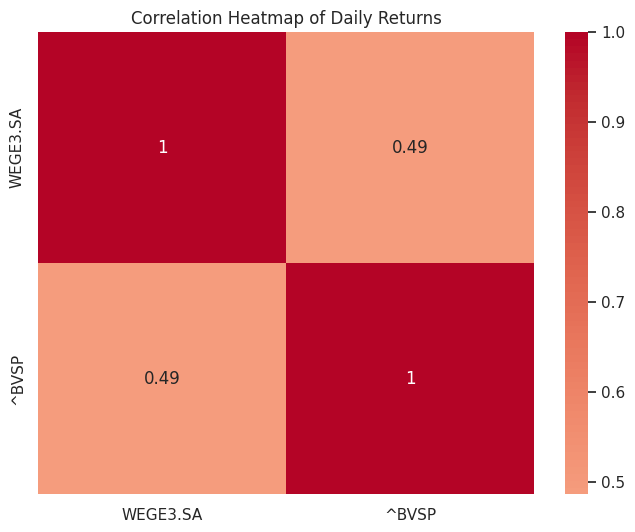

In [6]:
import seaborn as sns
# Calculate correlations
correlation_matrix = daily_returns.corr()

# Set Seaborn style
sns.set(style='white')

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Daily Returns')
plt.show()

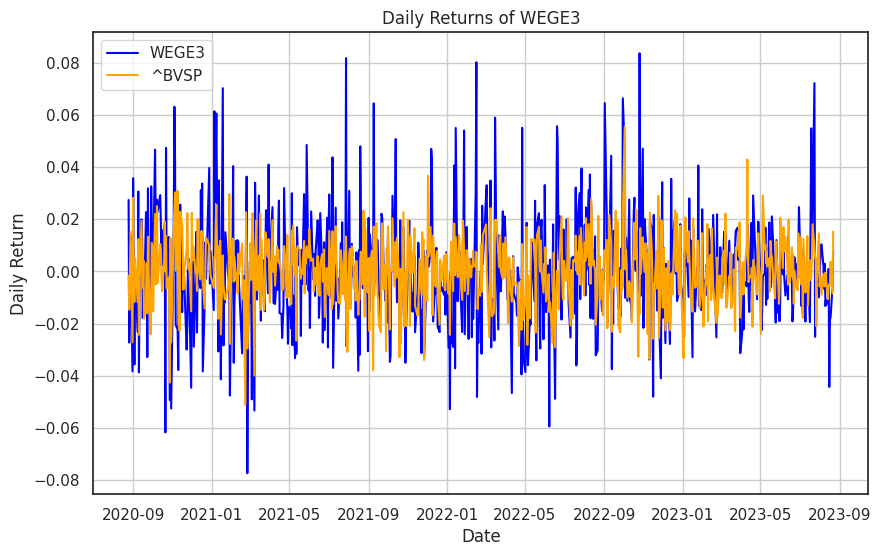

In [7]:
    # Plotting daily returns
    plt.figure(figsize=(10, 6))
    plt.plot(daily_returns.index, daily_returns[stock_symbol], color='blue', label=stock_name)
    plt.plot(daily_returns.index, daily_returns[market_index_symbol], color='orange', label=market_index_symbol)
    plt.title(f'Daily Returns of {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    plt.show()